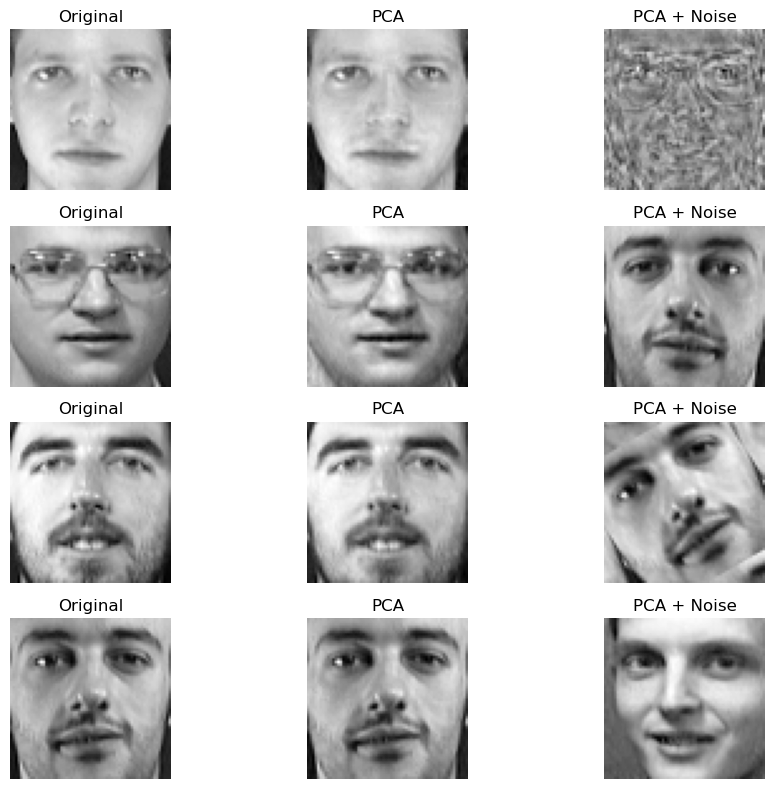

In [4]:
#Import what is necessary
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from skimage import transform, util
import matplotlib.pyplot as plt

# Load the dataset
faces = datasets.fetch_olivetti_faces()
X = faces.data

# Apply PCA to the dataset, preserving 99% of the variance
pca = PCA(0.99)
X_pca = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_pca)

# Compute the reconstruction error for each image
reconstruction_errors = np.sum((X - X_reconstructed) ** 2, axis=1)

# Select a few images to modify
image_indices = [0, 50, 100, 150]

# Modify the selected images with rotation, flipping, and darkening
for index in image_indices:
    image = X[index].reshape((64, 64))
    rotated = transform.rotate(image, angle=30, mode='wrap')
    flipped = np.fliplr(image)
    darkened = util.invert(image/255.0)
    X_mod = np.vstack([X, rotated.reshape(-1), flipped.reshape(-1), darkened.reshape(-1)])
    
# Apply PCA to the modified dataset
pca_mod = PCA(0.99)
X_pca_mod = pca_mod.fit_transform(X_mod)
X_reconstructed_mod = pca_mod.inverse_transform(X_pca_mod)

# Compute the reconstruction error for each modified image
reconstruction_errors_mod = np.sum((X_mod - X_reconstructed_mod) ** 2, axis=1)

# Plot the results
plt.figure(figsize=(10, 8))
for i, index in enumerate(image_indices):
    image = X[index].reshape((64, 64))
    image_pca = X_reconstructed[index].reshape((64, 64))
    image_pca_mod = X_reconstructed_mod[-(i+1)].reshape((64, 64))
    
    plt.subplot(len(image_indices), 3, 3*i+1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(len(image_indices), 3, 3*i+2)
    plt.imshow(image_pca, cmap='gray')
    plt.title('PCA')
    plt.axis('off')
    
    plt.subplot(len(image_indices), 3, 3*i+3)
    plt.imshow(image_pca_mod, cmap='gray')
    plt.title('PCA + Noise')
    plt.axis('off')

plt.tight_layout()
plt.show()
